## Reference:
Matt Mazur:
   * blogpost: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
   * github repository: https://github.com/mattm/simple-neural-network

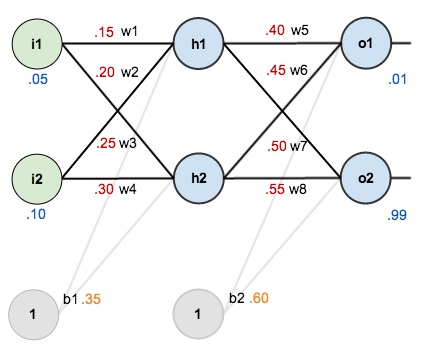

## Forward pass
### Hidden layer:

$net_{h1} = w_1 * i_1 + w_2 * i_2 + b_1 * 1$

$out_{h1} = \frac{1}{1 \; + \;\exp-^{net_{h1}}}$
<br>
<br>
$net_{h2} = w_3 * i_1 + w_4 * i_2 + b_1 * 1$

$out_{h2} = \frac{1}{1 \; + \; \exp-^{net_{h2}}}$
<br>
### Output layer:
$net_{o1} = w_5 * out_{h1} + w_6 * out_{h2} + b_2 * 1$

$out_{o1} = \frac{1}{1 \; + \;\exp-^{net_{o1}}}$
<br>
<br>
$net_{o2} = w_7 * out_{h1} + w_8 * out_{h2} + b_2 * 1$

$out_{o2} = \frac{1}{1 \; + \; \exp-^{net_{o2}}}$

## Total Error
$E_{total} = E_{o1} + E_{o2} = \frac{1}{2} (target_{o1} - out_{o1})^{2} + \frac{1}{2} (target_{o2} - out_{o2})^{2}$

## Backward Pass
Consider, we want to know how much change in $w_5$ to affects the total error : $\frac{\partial{E_{total}}}{\partial{w_5}}$

### By Chain-Rule:
$\frac{\partial{E_{total}}}{\partial{w_5}} = \frac{\partial{E_{total}}}{\partial{out_{o1}}} \cdot \frac{\partial{out_{o1}}}{\partial{net{o1}}} \cdot \frac{\partial{net_{o1}}}{\partial{w_5}}$

$\frac{\partial{E_{total}}}{\partial{w_5}} = -(target_{o1} - out_{o1}) \cdot out_{o1}(1 - out_{o1}) \cdot out_{h1}$

$\frac{\partial{E_{total}}}{\partial{w_5}} = \delta_{o1} \cdot out_{h1}$

**Update w5**:

$w_5^+ = w_5 - \eta * \frac{\partial{E_{total}}}{\partial{w_5}}$


Similarly,

$\frac{\partial{E_{total}}}{\partial{w_6}} = \delta_{o1} \cdot out_{h2}$

**Update w6**:

$w_6^+ = w_6 - \eta * \frac{\partial{E_{total}}}{\partial{w_6}}$


### By Chain-Rule:
$\frac{\partial{E_{total}}}{\partial{w_7}} = \frac{\partial{E_{total}}}{\partial{out_{o2}}} \cdot \frac{\partial{out_{o2}}}{\partial{net{o2}}} \cdot \frac{\partial{net_{o2}}}{\partial{w_7}}$

$\frac{\partial{E_{total}}}{\partial{w_7}} = -(target_{o2} - out_{o2}) \cdot out_{o2}(1 - out_{o2}) \cdot out_{h1}$

$\frac{\partial{E_{total}}}{\partial{w_7}} = \delta_{o2} \cdot out_{h1}$

**Update w7**:

$w_7^+ = w_7 - \eta * \frac{\partial{E_{total}}}{\partial{w_7}}$

Similarly,

$\frac{\partial{E_{total}}}{\partial{w_8}} = \delta_{o2} \cdot out_{h2}$

**Update w8**:

$w_8^+ = w_8 - \eta * \frac{\partial{E_{total}}}{\partial{w_8}}$


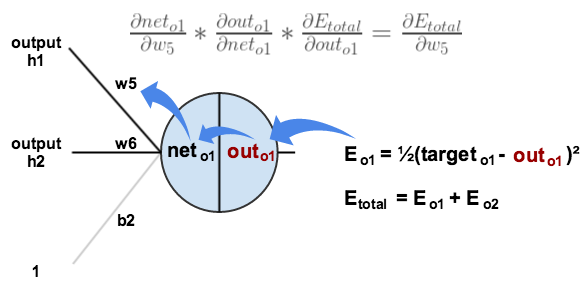

## Continue the Backward Pass  - update w1, w2, w3, w4
### By Chain-Rule:
$$\frac{\partial{E_{total}}}{\partial w_1} = \frac{\partial E_{total}}{\partial out_{h1}} \cdot \frac{\partial out_{h1}}{\partial net_{h1}} \cdot \frac{\partial net_{h1}}{\partial w_1}$$

We know that $out_{h1}$ affects both $out_{o1}$ and $out_{o2}$, 

therefore $\frac{\partial E_{total}}{\partial out_{h1}}$ needs to take into consideration its effect on both output neurons (and therefore error):

$$\frac{\partial E_{total}}{\partial out_{h1}} = \frac{\partial E_{o1}}{\partial out_{h1}} \; + \; \frac{\partial E_{o2}}{\partial out_{h1}}$$

<br>
$$\frac{\partial E_{total}}{\partial out_{h1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial net_{o1}} \cdot \frac{\partial net_{o1}}{\partial out_{h1}} \; + \; \frac{\partial E_{o2}}{\partial out_{o2}} \cdot \frac{\partial out_{o2}}{\partial net_{o2}} \cdot \frac{\partial net_{o2}}{\partial out_{h1}}$$

$$\frac{\partial E_{total}}{\partial out_{h1}} = -(target_{o1} - out_{o1}) \cdot out_{o1}(1 - out_{o1}) \cdot w_5 \; + \; -(target_{o2} - out_{o2}) \cdot out_{o2}(1 - out_{o2}) \cdot w_7$$

$$\frac{\partial E_{total}}{\partial out_{h1}} = \delta_{o1} \cdot w_5 \; + \; \delta_{o2} \cdot w_7$$

**Finally, plugging this result to the chain-rule equation above:**

$$\frac{\partial{E_{total}}}{\partial w_1} = (\delta_{o1} \cdot w_5 \; + \; \delta_{o2} \cdot w_7) \cdot \frac{\partial out_{h1}}{\partial net_{h1}} \cdot \frac{\partial net_{h1}}{\partial w_1}$$

$$\frac{\partial{E_{total}}}{\partial w_1} = (\delta_{o1} \cdot w_5 \; + \; \delta_{o2} \cdot w_7) \cdot out_{h1}(1 - out_{h1}) \cdot \frac{\partial net_{h1}}{\partial w_1}$$

$$\frac{\partial{E_{total}}}{\partial w_1} = \delta_{h1} \cdot \frac{\partial net_{h1}}{\partial w_1}$$

**Recall:**

$net_{h1} = w_1 * i_1 + w_2 * i_2 + b_1 * 1$

$\frac{\partial net_{h1}}{\partial w_1} = i_1$

**Therefore:**

$$\frac{\partial{E_{total}}}{\partial w_1} = \delta_{h1} \cdot i_1$$


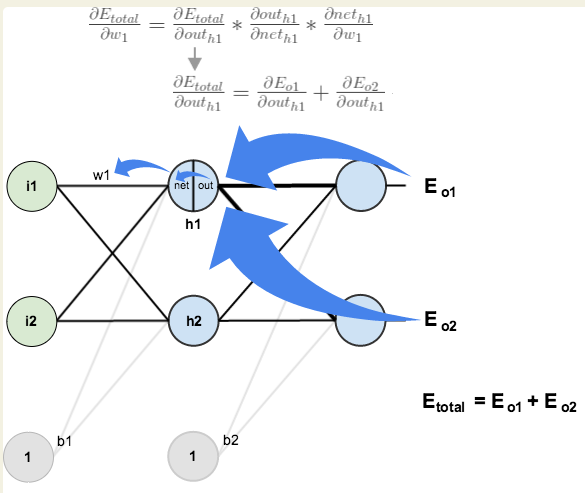

In [13]:
import random
import math
#import numpy as np

In [47]:
class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []
        
    def calc_out(self, inputs):
        self.inputs = inputs
        #net = np.sum(np.array(self.inputs) * np.array(self.weights))    # np.array operation is slower
        #self.out = self.squash(net)
        self.out = self.squash(self.calc_net())
        return self.out
 

    def calc_net(self):
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias
               
    
    # apply the logistic function (sigmoid) to squash the output of the neuron
    def squash(self, net):
        return 1/(1 + math.exp(-net))
    
    # Determine how much the neuron's total input has to change to move closer to the expected output
    # Now that we have the partial derivative of the error with respect to the output:
    # (∂E/∂yⱼ) or in notes written as (∂E/∂out) and
    # the derivative of the output with respect to the total net input:
    # (dyⱼ/dzⱼ) or (∂out/∂net) we can calculate
    # the partial derivative of the error with respect to the total net input.
    # This value is also known as the delta (δ)
    # δ = ∂E/∂zⱼ = ∂E/∂yⱼ * dyⱼ/dzⱼ    or  δ = ∂E/∂net = ∂E/∂out * ∂out/∂net
    def calc_delta(self, target_out):
        return self.calc_pd_error_wrt_out(target_out) * self.calc_pd_out_wrt_net()
    
    def calc_error(self, target_out):
        return 0.5 * (target_out - self.out)**2
    
    def calc_pd_error_wrt_out(self, target_out):
        return -(target_out - self.out)
    
    def calc_pd_out_wrt_net(self):
        return self.out * (1 - self.out)
    
    def calc_pd_net_wrt_weight(self, index):
        return self.inputs[index]
    

In [28]:
class NeuronLayer:
    def __init__(self, n_neurons, bias):
        # every neuron in a layer shares the same bias
        self.n_neurons = n_neurons
        self.bias = bias if bias else random.random()        
        self.neurons = []
        for i in range(n_neurons):
            self.neurons.append(Neuron(self.bias))
        
    def inspect(self):
        print('Neurons:', self.n_neurons)
        for i in range(self.n_neurons):
            print('  Neuron', i)
            for j in range(len(self.neurons[i].weights)):
                print('  Weight:', self.neurons[i].weights[j])
            print('  Bias:', self.bias)
    
    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.calc_out(inputs))
        return outputs
            
    
    def get_outputs(self):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.out)
        return outputs

In [51]:
class NeuralNetwork:
    LEARNING_RATE = 0.5
    
    # n_hidden: number of neurons in hidden layer
    # n_outputs: number of neurons in output layer
    def __init__(self, n_inputs, n_hidden, n_outputs, hidden_layer_weights=None, 
                 hidden_layer_bias=None, output_layer_weights=None, output_layer_bias=None):
        
        self.n_inputs = n_inputs
        
        self.hidden_layer = NeuronLayer(n_hidden, hidden_layer_bias)
        self.output_layer = NeuronLayer(n_outputs, output_layer_bias)
        
        # init weights from inputs to hidden
        self.init_weights_ih(hidden_layer_weights)
        
        # init weights from hidden to output
        self.init_weights_ho(output_layer_weights)
        
        
    def init_weights_ih(self, hidden_layer_weights):
        weight_idx = 0
        for i in range(len(self.hidden_layer.neurons)):
            for _ in range(self.n_inputs):
                if not hidden_layer_weights:
                    self.hidden_layer.neurons[i].weights.append(random.random())
                else:
                    self.hidden_layer.neurons[i].weights.append(hidden_layer_weights[weight_idx])
                weight_idx += 1
        
   
    def init_weights_ho(self, output_layer_weights):
        weight_idx = 0
        for i in range(len(self.output_layer.neurons)):
            for _ in range(len(self.hidden_layer.neurons)):
                if not output_layer_weights:
                    self.output_layer.neurons[i].weights.append(random.random())
                else:
                    self.output_layer.neurons[i].weights.append(output_layer_weights[weight_idx])
                weight_idx += 1        

                
    def inspect(self):
        print('------------')
        print('* Inputs: {}'.format(self.n_inputs))
        print('------------')
        print('Hidden Layer')
        self.hidden_layer.inspect()
        print('------------')
        print('* Output Layer')
        self.output_layer.inspect()
        print('------------')
        
    
    def feed_forward(self, inputs):
        hidden_layer_outputs = self.hidden_layer.feed_forward(inputs)
        return self.output_layer.feed_forward(hidden_layer_outputs)
        
    # uses online learning, i.e. updating the weights after each training case
    def train(self, training_inputs, training_outputs):
        # initialize the weights
        self.feed_forward(training_inputs)
        
        # number of neurons in the output_layer
        n_out = len(self.output_layer.neurons)
        
        # number of neurons in the hidden_layer
        n_hidden = len(self.hidden_layer.neurons)
        
        # 1. output neuron deltas
        deltas_out = [0] * n_out
        for idx_out in range(n_out):
            deltas_out[idx_out] = self.output_layer.neurons[idx_out].calc_delta(training_outputs[idx_out])
        
        # 2. hidden neuron deltas
        deltas_hidden = [0] * n_hidden
        for idx_hidden in range(n_hidden):
            d_errors_wrt_hidden_outputs = 0
            for idx_out in range(n_out):
                d_errors_wrt_hidden_outputs += deltas_out[idx_out] * self.output_layer.neurons[idx_out].weights[idx_hidden]
            
            deltas_hidden[idx_hidden] = d_errors_wrt_hidden_outputs * self.hidden_layer.neurons[idx_hidden].calc_pd_out_wrt_net()
            
        # 3. Update output neuron weights
        for idx_out in range(n_out):
            n_weights = len(self.output_layer.neurons[idx_out].weights)
            for idx_w_ho in range(n_weights):
                pd_error_wrt_w = deltas_out[idx_out] * self.output_layer.neurons[idx_out].calc_pd_net_wrt_weight(idx_w_ho)
                
                # update weight (weight_hidden_to_out)
                self.output_layer.neurons[idx_out].weights[idx_w_ho] -= self.LEARNING_RATE * pd_error_wrt_w
                
        # 4. Update hidden neuron weights
        for idx_hidden in range(n_hidden):
            n_weights = len(self.hidden_layer.neurons[idx_hidden].weights)
            for idx_w_ih in range(n_weights):
                pd_error_wrt_w = deltas_hidden[idx_hidden] * self.hidden_layer.neurons[idx_hidden].calc_pd_net_wrt_weight(idx_w_ih)
                
                # update weight (weight_input_to_hidden)
                self.hidden_layer.neurons[idx_hidden].weights[idx_w_ih] -= self.LEARNING_RATE * pd_error_wrt_w
                
                
    def calc_total_error(self, training_sets):
        total_error = 0
        for i in range(len(training_sets)):
            training_inputs, training_outputs = training_sets[i]
            self.feed_forward(training_inputs)
            for j in range(len(training_outputs)):
                total_error += self.output_layer.neurons[j].calc_error(training_outputs[j])
        return total_error 

In [52]:
nn = NeuralNetwork(2, 2, 2, hidden_layer_weights=[0.15, 0.2, 0.25, 0.3], hidden_layer_bias=0.35, 
                   output_layer_weights=[0.4, 0.45, 0.5, 0.55], output_layer_bias=0.6)

In [49]:
for i in range(10000):
    nn.train([0.05, 0.1], [0.01, 0.99])
    if i == 99 or i == 999 or i == 9999:
        print(i, round(nn.calc_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))

99 0.02916668
999 0.001626109
9999 5.583e-05


In [53]:
nn.inspect()

------------
* Inputs: 2
------------
Hidden Layer
Neurons: 2
  Neuron 0
  Weight: 0.15
  Weight: 0.2
  Bias: 0.35
  Neuron 1
  Weight: 0.25
  Weight: 0.3
  Bias: 0.35
------------
* Output Layer
Neurons: 2
  Neuron 0
  Weight: 0.4
  Weight: 0.45
  Bias: 0.6
  Neuron 1
  Weight: 0.5
  Weight: 0.55
  Bias: 0.6
------------
